In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,SCORERS
from sklearn.model_selection import cross_val_score

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.api as sm 

# for boosting
from sklearn.model_selection import GridSearchCV



!ls

__notebook_source__.ipynb


In [3]:
df = pd.read_csv('/kaggle/input/nyc-rolling-data.csv')

In [4]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43,NaN,S1,743 EAST 6TH STREET,NaN,...,1.0,1.0,2.0,2090.0,3680.0,1940.0,1,S1,3200000,2019-07-24 00:00:00
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,...,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,0,2019-09-25 00:00:00
2,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,...,2.0,0.0,2.0,1510.0,4520.0,1900.0,1,B9,0,2019-07-22 00:00:00
3,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,56,NaN,C0,263 EAST 7TH STREET,NaN,...,3.0,0.0,3.0,2430.0,3600.0,1899.0,1,C0,6300000,2019-04-30 00:00:00
4,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393,9,NaN,C0,604 EAST 11TH STREET,NaN,...,3.0,0.0,3.0,2375.0,5110.0,1939.0,1,C0,0,2019-10-24 00:00:00


In [5]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [6]:
df.fillna(-1,inplace=True)

In [7]:
df['BUILDING CLASS CATEGORY']=df['BUILDING CLASS CATEGORY'].str[0:2]
df['BUILDING CLASS CATEGORY']=df['BUILDING CLASS CATEGORY'].astype(int)
df.drop(columns=['EASE-MENT','APARTMENT NUMBER','ADDRESS'], inplace=True)

In [8]:
df['BUILDING CLASS CATEGORY']=df['BUILDING CLASS CATEGORY'].astype(int)

In [9]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,1,1,376,43,S1,10009.0,1.0,1.0,2.0,2090.0,3680.0,1940.0,1,S1,3200000,2019-07-24 00:00:00
1,1,ALPHABET CITY,1,1,390,61,A4,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,0,2019-09-25 00:00:00
2,1,ALPHABET CITY,2,1,404,1,B9,10009.0,2.0,0.0,2.0,1510.0,4520.0,1900.0,1,B9,0,2019-07-22 00:00:00
3,1,ALPHABET CITY,3,1,377,56,C0,10009.0,3.0,0.0,3.0,2430.0,3600.0,1899.0,1,C0,6300000,2019-04-30 00:00:00
4,1,ALPHABET CITY,3,1,393,9,C0,10009.0,3.0,0.0,3.0,2375.0,5110.0,1939.0,1,C0,0,2019-10-24 00:00:00


In [10]:
df=df[df['SALE PRICE']!=0]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56741 entries, 0 to 81482
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         56741 non-null  int64  
 1   NEIGHBORHOOD                    56741 non-null  object 
 2   BUILDING CLASS CATEGORY         56741 non-null  int64  
 3   TAX CLASS AT PRESENT            56741 non-null  object 
 4   BLOCK                           56741 non-null  int64  
 5   LOT                             56741 non-null  int64  
 6   BUILDING CLASS AT PRESENT       56741 non-null  object 
 7   ZIP CODE                        56741 non-null  float64
 8   RESIDENTIAL UNITS               56741 non-null  float64
 9   COMMERCIAL UNITS                56741 non-null  float64
 10  TOTAL UNITS                     56741 non-null  float64
 11  LAND SQUARE FEET                56741 non-null  float64
 12  GROSS SQUARE FEET               

In [12]:
len(df['BUILDING CLASS AT TIME OF SALE'].unique())

156

In [13]:
len(df['BUILDING CLASS AT PRESENT' ].unique())

155

In [14]:
len(df['BUILDING CLASS CATEGORY' ].unique())

44

# Encoding of Categorical 

In [15]:

one_hot =['NEIGHBORHOOD','TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE']
df=pd.get_dummies(df,columns=one_hot)

In [16]:
features=['BOROUGH','BLOCK','LOT','BUILDING CLASS CATEGORY','ZIP CODE','RESIDENTIAL UNITS',
          'COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT',]
y =['SALE PRICE']

In [17]:
X_train ,X_test, y_train, y_test = train_test_split(df.drop(columns=['SALE PRICE','SALE DATE']),df['SALE PRICE'])

# Random Forrest Regressor

In [35]:
model_rf = RandomForestRegressor(random_state=0,n_jobs=4)
model_rf.fit(X_train,y_train)
predicted = model_rf.predict(X_test)
mean_absolute_error(y_test,predicted)

1205792.2909356935

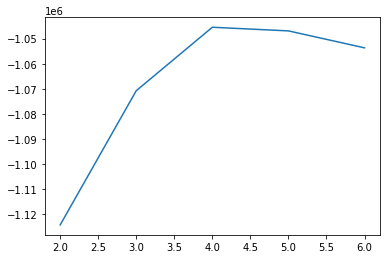

In [36]:
 
model_rf = RandomForestRegressor(random_state=0,min_samples_leaf=3,n_jobs=4)
#model_rf.fit(X_train,y_train)
#predicted = model_rf.predict(X_train)
#mean_absolute_error(y_train,predicted)
error=[]
split=[]
for cv in range(2,7):
    split.append(cv)
    error.append(np.mean(cross_val_score(model_rf,X_train,y_train,cv=cv,scoring='neg_mean_absolute_error')))
plt.plot(split,error)

In [37]:
x_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,x_sm)
model.fit().summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     34.31
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        16:19:50   Log-Likelihood:            -7.4901e+05
No. Observations:               42555   AIC:                         1.499e+06
Df Residuals:                   42085   BIC:                         1.503e+06
Df Model:                         469                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   2.184e+07   8.05e+06      2.713      0.007    6.06e+06    3.76e+07
BOROUGH                                -1.437e+06   2.28e+06     -0.631      0.528    -5.9e+06    3.03e+06
BUILDING CLASS CATEGORY                 1.553e+05   3.08e+05      0.504      0.614   -4.49e+05    7.59e+05
BLOCK                                    -63.4620    119.417     -0.531      0.595    -297.521     170.597
LOT                                       -3.8097    150.614     -0.025      0.980    -299.016     291.396
ZIP CODE                                -489.6487    351.738     -1.392      0.164   -1179.063     199.765
RESIDENTIAL UNITS                      -2.005e+06   1.01e+06     -1.992      0.046   -3.98e+06    -3.2e+04
COMMERCIAL UNITS                       -2.308e+06   1.01e+06     -2.288      0.022   -4.28e+06   -3.31e+05
TOTAL UNITS                             2.349e+06   1.01e+06      2.329      0.020    3.72e+05    4.33e+06
LAND SQUARE FEET                           1.0727      0.562      1.909      0.056      -0.029       2.174
GROSS SQUARE FEET                        -14.1791      2.735     -5.184      0.000     -19.540      -8.818
YEAR BUILT                             -1762.0091    136.445    -12.914      0.000   -2029.444   -1494.575
TAX CLASS AT TIME OF SALE              -5.941e+06   3.81e+06     -1.560      0.119   -1.34e+07    1.52e+06
NEIGHBORHOOD_AIRPORT LA GUARDIA         8.102e+05   6.44e+06      0.126      0.900   -1.18e+07    1.34e+07
NEIGHBORHOOD_ALPHABET CITY              -4.28e+06   5.25e+06     -0.816      0.415   -1.46e+07    6.01e+06
NEIGHBORHOOD_ANNADALE                   1.714e+06   4.19e+06      0.409      0.683    -6.5e+06    9.93e+06
NEIGHBORHOOD_ARDEN HEIGHTS              1.785e+06   4.11e+06      0.434      0.664   -6.28e+06    9.85e+06
NEIGHBORHOOD_ARROCHAR                   3.115e+06   4.72e+06      0.660      0.509   -6.13e+06    1.24e+07
NEIGHBORHOOD_ARROCHAR-SHORE ACRES       1.994e+06   4.94e+06      0.404      0.686   -7.69e+06    1.17e+07
NEIGHBORHOOD_ARVERNE                     1.57e+06   2.47e+06      0.635      0.525   -3.27e+06    6.41e+06
NEIGHBORHOOD_ASTORIA                    1.105e+06   1.92e+06      0.574      0.566   -2.67e+06    4.88e+06
NEIGHBORHOOD_BATH BEACH                 -3.48e+05   1.05e+06     -0.332      0.740    -2.4e+06    1.71e+06
NEIGHBORHOOD_BATHGATE                  -4.343e+06   3.26e+06     -1.333      0.183   -1.07e+07    2.04e+06
NEIGHBORHOOD_BAY RIDGE                 -9.951e+04   7.56e+05     -0.132      0.895   -1.58e+06    1.38e+06
NEIGHBORHOOD_BAYCHESTER                -2.891e+06   2.89e+06     -1.000      0.317   -8.56e+06    2.77e+06
NEIGHBORHOOD_BAYSIDE                    1.402e+06   1.88e+06      0.745      0.456   -2

# Linear regressor

In [38]:
#Linear regression
model_lr= LinearRegression(n_jobs=4)
#model_lr.fit(X_train, y_train)


np.mean(cross_val_score(model_lr,X_train,y_train,cv=3,scoring='neg_mean_absolute_error'))



-5546608529.124942

# Lasso Regressor

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8543975920039997e+18, tolerance: 512042505606437.06
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8905336263356022e+18, tolerance: 534535902440031.44
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.906157423286657e+17, tolerance: 290692890399006.8
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

1


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8543975920039997e+18, tolerance: 512042505606437.06
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8905336263356022e+18, tolerance: 534535902440031.44
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.906157423286657e+17, tolerance: 290692890399006.8
  positive)


26


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8543975920039997e+18, tolerance: 512042505606437.06
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8905336263356022e+18, tolerance: 534535902440031.44
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.906157423286657e+17, tolerance: 290692890399006.8
  positive)


51


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8543975920039997e+18, tolerance: 512042505606437.06
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8905336263356022e+18, tolerance: 534535902440031.44
  positive)


76


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.906157423286657e+17, tolerance: 290692890399006.8
  positive)


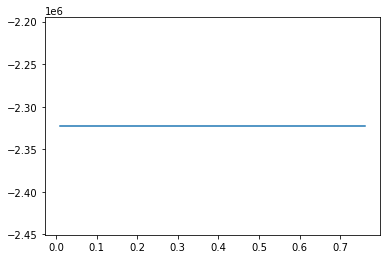

In [39]:
# Lasso Regression
model_lasso=Lasso()
# model_lasso.fit(X_train, y_train)
np.mean(cross_val_score(model_lasso,X_train,y_train,cv=3,scoring='neg_mean_absolute_error'))

alpha=[]
error =[]

for i in range(1,100, 25):
    alpha.append(i/100)
    model_las=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(model_lasso,X_train,y_train,cv=3,scoring='neg_mean_absolute_error')))
    print(i)
plt.plot(alpha,error)

In [40]:
### Alpha doesnt affect mean cross validation socre, perhaps the model is not the right choice

# Ridge Regressor

In [41]:
model_rdg = Ridge(alpha=1, normalize=True)
#model_rdg.fit(X_train, y_train)
#predicted = model_rdg.predict(X_train)
np.mean(cross_val_score(model_rdg,X_train,y_train,cv=3,scoring='neg_mean_absolute_error'))

-1936619.9343494514

# Grid Search

In [ ]:
parameters={
    'criterion':('mse','mae'),
    'max_features':('auto','sqrt','log2'),
    }
gs = GridSearchCV(model_rf, parameters,scoring='neg_mean_absolute_error',cv=4)

gs.fit(X_train,y_train)

In [ ]:
# Test models

In [ ]:
gs.best_score_
gs.best_estimator_